# Lab 9 - Dense Neural Network
## Sudhan Shrestha [8889436]

1. Using Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with (2 points). 

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

*Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.*

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
print(f'Image DType: {type(train_images)}')
print(f'Image Element DType: {type(train_images[0,0,0])}')
print(f'Label Element DType: {type(train_labels[0])}')
print('***********************')
print('**Shapes:**')
print('Train Data:')
print(f'Images: {train_images.shape}')
print(f'Labels: {train_labels.shape}')
print('Test Data:') 
print(f'Images: {test_images.shape}')
print(f'Labels: {test_labels.shape}')
print('***********************')
print('Image Data Range:')
print(f'Min: {train_images.min()}')
print(f'Max: {train_images.max()}')

Image DType: <class 'numpy.ndarray'>
Image Element DType: <class 'numpy.uint8'>
Label Element DType: <class 'numpy.uint8'>
***********************
**Shapes:**
Train Data:
Images: (60000, 28, 28)
Labels: (60000,)
Test Data:
Images: (10000, 28, 28)
Labels: (10000,)
***********************
Image Data Range:
Min: 0
Max: 255


- The image data are in the shape of (28, 28), which means each image is a 28x28 pixel square.
- The training images contains 60,000 images and its labeles.
- Similarly, the test images contains 10,000 images and its corresponding labels.

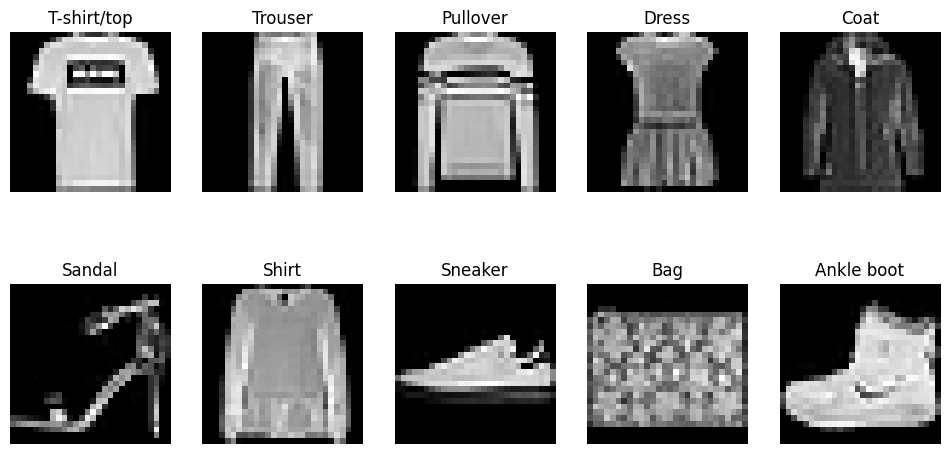

In [4]:
image_labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}
# Display a single unique image from each class
plt.figure(figsize=(12, 6))
unique_images = np.unique(train_labels)
for i, image_index in enumerate(unique_images):
    plt.subplot(2, 5, i + 1)
    index = np.where(train_labels == image_index)[0][0]
    plt.imshow(train_images[index], cmap='gray')
    plt.title(image_labels[image_index])
    plt.axis('off')
plt.show()

Data preprossing

In [5]:
# flattening the 28x28 image into  1 dimension
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

print('Shapes after flattening:')
print('Train Data:')
print(f'Images: {train_images.shape}')
print('Test Data:') 
print(f'Images: {test_images.shape}')


Shapes after flattening:
Train Data:
Images: (60000, 784)
Test Data:
Images: (10000, 784)


In [6]:
# Normalizing the image pixels values to 0 and 1
train_images = train_images.astype("float32") / 255  # normalizing the data to the range [0,1] by min-max range, and casting it to float32
test_images = test_images.astype("float32") / 255

In [7]:
print(train_images.min())
print(train_images.max())
print(train_images.shape)
print(train_images[0].shape)

0.0
1.0
(60000, 784)
(784,)


2. Train a dense neural network using Keras (2 points)

In [8]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4929 - accuracy: 0.8220
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3724 - accuracy: 0.8663
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3406 - accuracy: 0.8783
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3231 - accuracy: 0.8870
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3118 - accuracy: 0.8902
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3020 - accuracy: 0.8941
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2914 - accuracy: 0.8990
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2828 - accuracy: 0.9015
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2778 - accuracy: 0.9057
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.27

In [9]:
prediction = model.predict(test_images)
prediction  


313/313 [==============================] - 0s 1ms/step


array([[1.5109697e-08, 1.4984243e-09, 2.6255564e-09, ..., 5.4512102e-02,
        1.0961249e-08, 9.4547600e-01],
       [3.3170371e-09, 2.1407841e-15, 9.9999893e-01, ..., 5.2993918e-11,
        1.9515248e-14, 2.3785518e-12],
       [3.8510761e-11, 1.0000000e+00, 1.1668717e-17, ..., 9.0783588e-17,
        5.9039403e-14, 6.8615828e-14],
       ...,
       [1.1513795e-07, 3.9781174e-17, 6.4453598e-09, ..., 2.1237938e-08,
        9.9999988e-01, 2.6305138e-13],
       [4.1719054e-12, 1.0000000e+00, 2.1954993e-11, ..., 5.0822836e-12,
        1.7573303e-10, 1.2948846e-10],
       [6.2750854e-07, 9.2938785e-07, 2.3535219e-06, ..., 7.4832272e-03,
        3.0220799e-06, 3.6945182e-06]], dtype=float32)

In [10]:
predicted_labels = np.argmax(prediction, axis=1)
print(predicted_labels)

[9 2 1 ... 8 1 5]


3. Evaluate its accuracy. Report accuracy, confusion metric, explore specific examples of incorrect classification, and drew some conclusions from this exploration (2 points)

In [11]:

test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Get predictions on the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)



Test Accuracy: 88.02%
313/313 [==============================] - 0s 1ms/step


The accurace of the model was found to be 88.02%, which means the model correctly predicted approximately 88.02% of the test image.

In [12]:
# Confusion matrix
confusion_matrix = tf.math.confusion_matrix(test_labels, predicted_labels)
print("Confusion Matrix:")
print(confusion_matrix.numpy())

Confusion Matrix:
[[873   1  20   9   4   2  88   0   3   0]
 [  4 970   1  18   3   0   4   0   0   0]
 [ 14   0 781   5 128   1  70   0   1   0]
 [ 37   4  35 850  48   0  23   0   3   0]
 [  0   0  81  13 841   0  64   0   1   0]
 [  0   0   0   1   0 949   0  32   2  16]
 [147   2  89  17  70   0 671   0   4   0]
 [  0   0   0   0   0   5   0 986   1   8]
 [  7   0   4   1   9   2  11   6 960   0]
 [  0   0   0   1   0   4   1  73   0 921]]


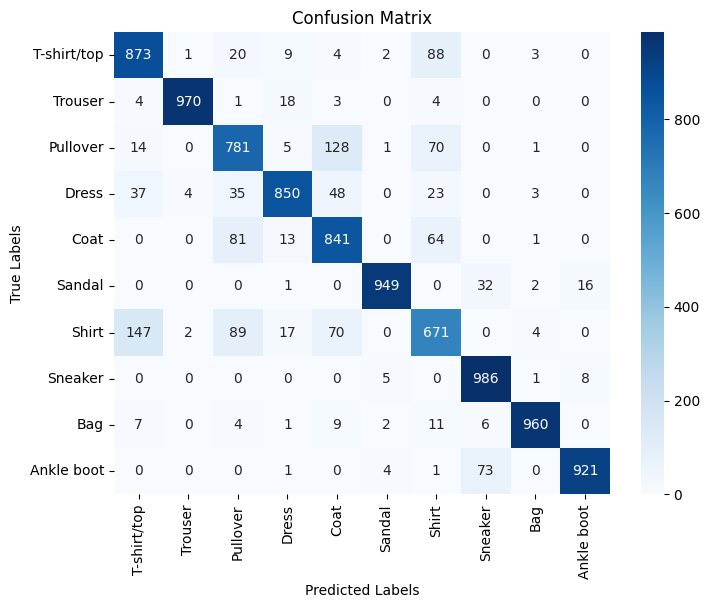

In [13]:

# the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=image_labels.values(), yticklabels=image_labels.values())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

The diagnoal elements represent the number of correct prediction for each image class, while the off-diagnoal elements representes misclassifications.

Observing our confusion matrix:
- The label `T-shirt/top` has been misclassified as `Shirt` 88 times.
- The label `Pullover` is misclassified as `Coat` 128 times and as `Shirt` 70 times.
- The label `Coat` is misclassified as `Pullover` 81 times and as `Shirt` 64 times.
- The label `Shirt` is mostly misclassified as `T-shirt/top` with 147 instances, as `Pullover` for 89 instance and as a `Coat` with 70 instance of misclassification.
- Tha label `Ankel book` is mostly misclassified as `Sneaker` with 73 instance of misclassification.

In [14]:
# finding the number of incorrect predicitions
misclassified_indices = np.where(predicted_labels != test_labels)[0]
print('Total number of incorrect indices',len(misclassified_indices))

Total number of incorrect indices 1198



Exploring Incorrect Classifications:


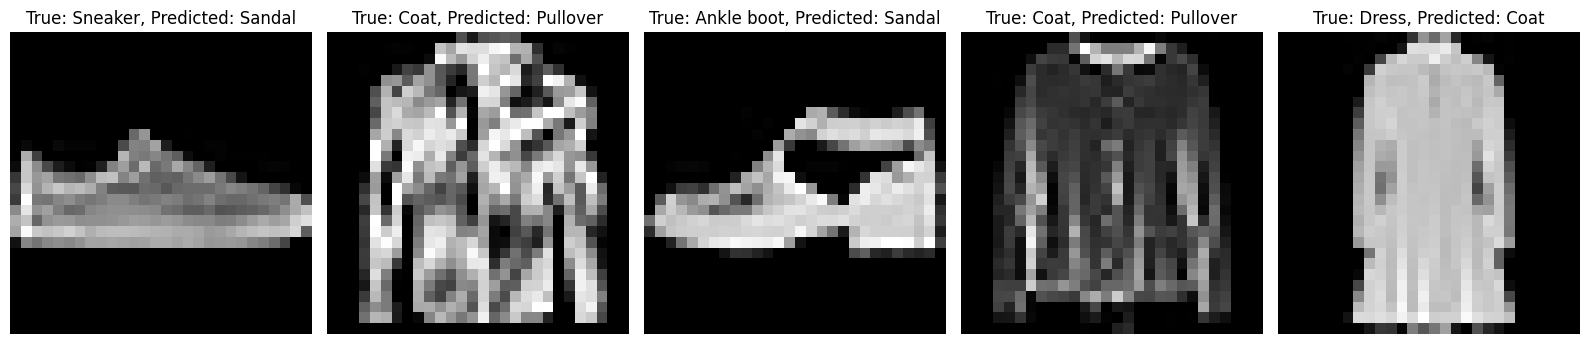

In [15]:
print("\nExploring Incorrect Classifications:")
plt.figure(figsize=(16, 9))
num_examples = 5
for i, idx in enumerate(misclassified_indices[:num_examples]):
    plt.subplot(1, num_examples, i + 1)
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {image_labels[test_labels[idx]]}, Predicted: {image_labels[predicted_labels[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()